# LAB 2 - TRANSFORMERS WITH HUGGINGFACE


In this lab you'll get to try two of the most famous NLP transformers: BERT and GPT-2

To download and use the models we will use huggingface transformers, a large platform for sharing transformer models. Check it out here https://huggingface.co/

https://huggingface.co/docs/transformers/index
https://huggingface.co/docs/transformers/quicktour

In this lab we will:
- Use DistilBERT to 
        - fill out missing words in sentences, 
        - extract features from texts
- Use DistilGPT-2 to generate a story

#### TODO
- Make sure to choose a runtime with GPU in google colab: Runtime / Change runtime type / Select GPU
- Install huggingface transformers by running the cell below

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00


# 1. BERT


## <ins>BACKGROUND</ins>


BERT is trained on the task of filling in masked words in sentences. We will use a distilled version of BERT made by huggingface called: DistilBERT

A distilled model is simply a condensed version of a model. It performs almost as well, but is lighter and faster than the original model.

We will use BERT for two things:
1. Feature extraction
2. Mask filling


First we will instantiate the model and its tokenizer. In huggingface, all models are accompanied with their specific tokenizer. There are many different sorts of tokenizers, which we won't cover. One reason for this is that different models have been trained with different special characters. BERT (and DistilBERT) are specifically trained using some special tokens in the text which we'll see shortly.

#### Note: The model and tokenizer we use are case-unsensitive, i.e. they don't know the difference between upper case and lower case letters. Thus to the model BERT = bert = Bert = BeRT

## <ins>EXERCISE</ins>

Explore the tokenizer and the model to see how they can be used as is


#### TODO:
- Explore the tokenizer



In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


### Tokenizer

The tokenizer is a complex object with many attributes. To get an idea of what's unique about this tokenizer you can use the cell below to see which special tokens exist, their representation in text, and how large the vocabulary of the tokenizer is.

Docs:  https://huggingface.co/docs/transformers/quicktour#autotokenizer

#### TODO: 
- Run the commands in the cells below to get information about the tokenizer 

In [ ]:
# The categories of special tokens used in DistilBERT
tokenizer.SPECIAL_TOKENS_ATTRIBUTES

['bos_token',
 'eos_token',
 'unk_token',
 'sep_token',
 'pad_token',
 'cls_token',
 'mask_token',
 'additional_special_tokens']

This page in documentation describes the special tokens https://huggingface.co/docs/transformers/v4.29.1/en/model_doc/bert#transformers.BertTokenizer

`CLS` is short for classification, but one can also see it as meaning "beginning of sentence"

In [ ]:
# List the special tokens - can you guess which match which in the previous list?
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [ ]:
# How many unique words have been used when training to tokenizer. 
# Words outside of this vocabulary will be mapped to the unk_token: '[UNK]'
tokenizer.vocab_size

30522

### Tokenize text

Now we'll use the tokenizer on a sample text. 

In [27]:
text = 'This is a sample sentence with fifteen words in it, one of them is antidisestablishmentarianism'
tokens = tokenizer.encode(text)
print('Tokens:\n', tokens)
print('\nNumber of tokens: ', len(tokens))

Tokens:
 [101, 2023, 2003, 1037, 7099, 6251, 2007, 5417, 2616, 1999, 2009, 1010, 2028, 1997, 2068, 2003, 3424, 10521, 4355, 7875, 13602, 3672, 12199, 2964, 102]

Number of tokens:  25



We also see that it's 25 tokens long even though our text only contained fifteen words. Can you figure out what happened?

#### TODO:
- Decode the input_ids using the decode() function in the tokenizer


In [28]:
# Use the decode function to see what happened
tokenizer.decode(tokens)

'[CLS] this is a sample sentence with fifteen words in it, one of them is antidisestablishmentarianism [SEP]'

In [ ]:
# to see what happens with the long word:
for token in tokens:
    tokenizer.decode(token)

In the output, the hashes signify the token is part of a word. You can find more examples here: https://huggingface.co/docs/transformers/tokenizer_summary#subword-tokenization

## Model

### <ins>BACKGROUND</ins>


Just like the tokenizer, the model variable contains a lot of information about the model. Huggingface is built on top of pytorch, and supports everything that the pytorch library enables.

We might be interested to see the architecture of the model and what the inputs to the model should look like. Run the two following cells

In [ ]:
print(model)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [ ]:
model.dummy_inputs

{'input_ids': tensor([[7, 6, 0, 0, 1],
         [1, 2, 3, 0, 0],
         [0, 0, 0, 4, 5]])}

## Send a sentence through model

Now let's see what comes out of the model if we send a sentence through it! Run the cell below


In [30]:
text = 'This sentence will go through BERT and come out the other side'
model_input = tokenizer(text, return_tensors='pt')

output = model(**model_input)

print(output.last_hidden_state)
print('\nShape:', output.last_hidden_state.shape)

tensor([[[-0.1551, -0.0323,  0.0877,  ...,  0.0033,  0.2715,  0.2747],
         [-0.1971, -0.0893,  0.1830,  ...,  0.0153,  0.3042,  0.1955],
         [ 0.3238, -0.0349,  0.0759,  ...,  0.0196, -0.1462, -0.2677],
         ...,
         [-0.7359, -0.3485,  0.2496,  ..., -0.2540,  0.5690, -0.4983],
         [-0.3434, -0.2095, -0.2392,  ...,  0.2645,  0.1149,  0.1997],
         [ 0.9707,  0.4362, -0.1645,  ...,  0.0281, -0.4067, -0.4955]]],
       grad_fn=<NativeLayerNormBackward0>)

Shape: torch.Size([1, 14, 768])


This is the output of the BERT encoder. It creates embeddings for the input text. The output is a tensor with the following dimensions: [_number_of_batches_, _number_of_tokens_, _embedding_dimensions_].

So in this case we had 1 batch with a total of 14 tokens, and the embeddings are in 769 dimensions.

We can then use these embeddings as inputs for other machine learning models, as they represent a very signal-rich representation of the input text.

It's hard to visualize 768 dimensions, but run the cell below to visualize our input text in one dimension.

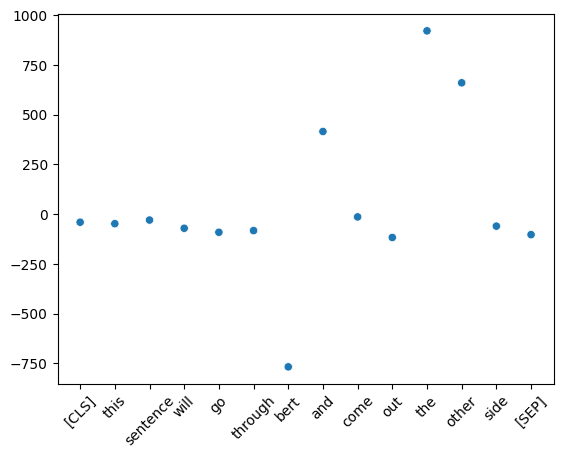

In [31]:
from sklearn.manifold import TSNE
import seaborn as sns
labels = tokenizer.decode(tokenizer.encode(text)).split()
tsne = TSNE(n_components=1, perplexity=0.9, random_state=42)
tsne_embeddings = tsne.fit_transform(output.last_hidden_state[0,:,:].detach())
g = sns.scatterplot(tsne_embeddings)
g.legend_.remove()
ticks = g.set_xticks(range(len(text.split())+2), labels=labels, rotation=45)

**NOTE** you may get a different output than the one above or what you get on a different machine. this is due to randomness inherent in the algorithm to reduce dimensions.

The important part here is that values around zero (on the y-axis) are "expected". Values farther away from 0 - positive or negative - are statistically unlikely. These probabilities are, of course, purely based on the training data.

# 2. Pipelines

### <ins>BACKGROUND</ins>


The output we got in the last step doesn't tell us much. We get a vector for every token in the input, but how can we use it concretely?

To make it easier to use the models we'll make use of huggingfaces pipelines. Pipelines are basically wrappers for models and tokenizers that automate getting an output for a specific task. There are many pipelines you can use, see a full list here: https://huggingface.co/docs/transformers/quicktour#pipeline

We will use the "fill-mask" and "feature-extraction" pipelines.

Loading and using a pipeline is super easy. We only have to specify the kind of pipeline and the model we want to use and huggingface takes care of the rest!


In [2]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
extractor = pipeline("feature-extraction", model='distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Fill mask

We know that BERT was originally trained to predict masked tokens in sentences. It should thus be pretty good at predicting missing words in sentences. 



### <ins>EXERCISE</ins>

The pipeline only supports one masked token at a time. It will spit out a list of what it thinks are the most likely words to fill in and their scores.


#### TODO:
- Play around with the unmasker by changing the masked_sentence

In [ ]:
# Fill mask 
# masked_sentence = "Hello there my friend. [MASK] are you doing today?"
masked_sentence = "Hello there my [MASK]. what are you doing today?"
unmasker(masked_sentence)

[{'score': 0.20484404265880585,
  'token': 9548,
  'token_str': 'darling',
  'sequence': 'hello there my darling. what are you doing today?'},
 {'score': 0.1133098229765892,
  'token': 6203,
  'token_str': 'dear',
  'sequence': 'hello there my dear. what are you doing today?'},
 {'score': 0.03995221108198166,
  'token': 3203,
  'token_str': 'lady',
  'sequence': 'hello there my lady. what are you doing today?'},
 {'score': 0.03463960438966751,
  'token': 2767,
  'token_str': 'friend',
  'sequence': 'hello there my friend. what are you doing today?'},
 {'score': 0.02364591509103775,
  'token': 12074,
  'token_str': 'sweetheart',
  'sequence': 'hello there my sweetheart. what are you doing today?'}]

## Choosing the most likely candidate

### <ins>EXERCISE</ins>

Out of the candidates you saw, you probably thought some were better than others. The model also scored how likely it thought the different options were. A natural way to choose is to simply pick the most probable option.

Using the unmasker pipeline's outputs, implement a function that you can use to fill one word in a sentence.

#### TODO:
- Complete the function fill_mask() 

In [ ]:
def fill_mask(masked_sentence):
    "Returns the masked sentence filled out with the most likely candidate"
    candidates = unmasker(masked_sentence)
    best_score = 0
    best_sentence = ""
    for candidate in candidates:
        if candidate["score"] > best_score:
            best_sentence = candidate["sequence"]
            best_score = candidate["score"]

    return best_sentence

In [ ]:
fill_mask('Hello where can I find the [MASK]')

'hello where can i find the?'

**NOTE** the above example will almost always select a question mark. the model has learned that statistically it is very likely that this particular sentence structure is concluded with a question mark.

# GPT-2


## <ins>BACKGROUND</ins>

GPT - Generative pre-training is a series of models released by OpenAI (GPT-3 was released in 2020). In 2019, GPT-2 got a lot of media attention in the heated debates about its potential dangers- and for writing stories about unicorns. 

Just like BERT, the GPT models are trained in an unsupervised fashion, but instead of the MLM task they are trained to do causal language modelling (CLM) - predicting the next word given the context. This arguably makes GPT-2 more fun to play around with than BERT.



### Unicorn story

The original unicorn story generated by the GPT-2 model trained by OpenAI.

#### Written prompt

> In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

#### Generated by GPT-2

> The scientist named the population, after their distinctive horn, Ovid’s Unicorn. These four-horned, silver-white unicorns were previously unknown to science.

> Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved.

> Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow.

> Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez.

> Pérez and his friends were astonished to see the unicorn herd. These creatures could be seen from the air without having to move too much to see them – they were so close they could touch their horns.

> While examining these bizarre creatures the scientists discovered that the creatures also spoke some fairly regular English. Pérez stated, “We can see, for example, that they have a common ‘language,’ something like a dialect or dialectic.”

> Dr. Pérez believes that the unicorns may have originated in Argentina, where the animals were believed to be descendants of a lost race of people who lived there before the arrival of humans in those parts of South America.

> While their origins are still unclear, some believe that perhaps the creatures were created when a human and a unicorn met each other in a time before human civilization. According to Pérez, “In South America, such incidents seem to be quite common.”

> However, Pérez also pointed out that it is likely that the only way of knowing for sure if unicorns are indeed the descendants of a lost alien race is through DNA. “But they seem to be able to communicate in English quite well, which I believe is a sign of evolution, or at least a change in social organization,” said the scientist.



Just like we used DistilBERT, we will here be using DistilGPT-2 from huggingface, which is a distilled version of GPT-2 small.



## <ins>EXERCISE</ins>

In this exercise we'll use distill-gpt2 to generate text.

#### TODO:
- Use Distill-GPT2 to generate text
- Generate text with your fine-tuned model

### Generate text with Distil-GPT2

Use the cell below to download and use distilgpt2. 

When you execute the cell you'll get a prompt for the model input that it will generate text from. You can of course change the length and number of outputs you want it to generate! Why not try giving it the same prompt that the unicorn text was generated from?

In [15]:
!pip install xformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 7.6 MB/s eta 0:00:00


In [6]:
prompt = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English."

In [10]:
generator = pipeline(task="text-generation", model="distilgpt2")

generator(prompt, max_new_tokens=50, num_return_sequences=4, return_full_text=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '\n\n\n‹To make the discovery of the unicorns that live in the Andes Mountains is an international task. This is because you know very well the genetic programming that happens to you, which determines things and the behavior of your new friend'},
 {'generated_text': '\n\n\n cheapest, cheapest and closest\nThe unicorns lived near Andes, a remote mountainside area, with great diversity of species of insects. The herd of unicorns lived in the Andes Mountains around 30,000 years ago and in'},
 {'generated_text': '\n\n\n"Many believe the unicorns are intelligent, and sometimes are quite intelligent," writes Peter O\'Donnell of University College London. Since then, the researchers have had to take a "step up and make a living" by keeping the animals'},
 {'generated_text': '\n\n\n\nBut a new study says that because they share the same language, they are likely to speak another language, instead of another. That could have one of the best possible languages in the world, 

### Other models

In the same way we did above, we can load other models. There are thousands available on Huggingface, including ones trained on Swedish data. 

Find another model for text generation on https://huggingface.co/ and create a generator for it!

In [ ]:
# write your code here

## Now what?

Feel like you're done playing around with generating text? Explore the Huggingface documentation, and perhaps find a tutorial on how you can fine tune a pretrained model on your own text! https://huggingface.co/docs/transformers/main/en/quicktour